In [ ]:
import os

def file(file_path):
    return os.stat(file_path).st_size == 0
#print ("os.state(file_path)")
file_path = input("Enter the path to the file: ")

if os.path.exists(file_path):
    if is_file_empty(file_path):
        print("The file is empty.")
    else:
        print("The file is not empty.")
else:
    print("The file path does not exist.")


os.state(file_path)


Enter the path of the folder containing 'distancemap.dat':  C:\Users\AquilA#42\Desktop\PRogLAb


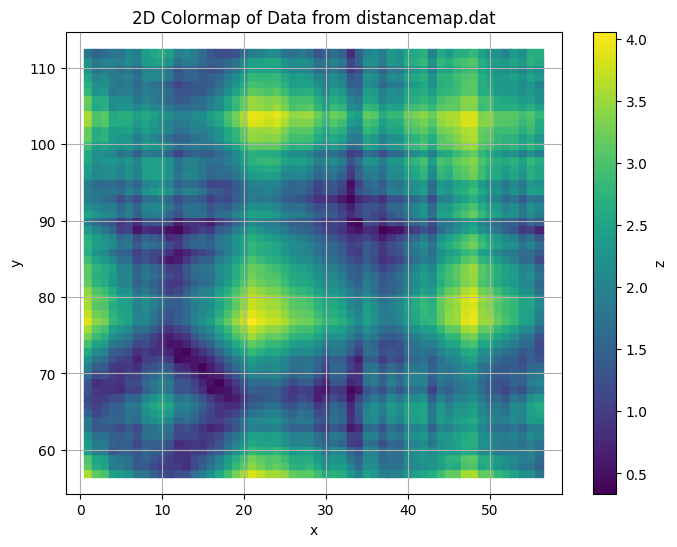

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

folder_path = input("Enter the path of the folder containing 'distancemap.dat': ")

file_path = os.path.join(folder_path, 'distancemap.dat')

if not os.path.exists(file_path):
    print("Error: 'distancemap.dat' not found in the specified folder.")
    exit()

try:
    data = np.loadtxt(file_path)
except OSError as e:
    print("Error: Unable to open 'distancemap.dat'. Please check the file and try again.")
    exit()

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=z, cmap='viridis', marker='s')
plt.colorbar(label='z')
plt.title('2D Colormap of Data from distancemap.dat')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


Enter the path of the folder containing 'distancemap.dat':  C:\Users\AquilA#42\Desktop\PRogLAb


Modified data has been written to 'modified_distancemap.dat'.


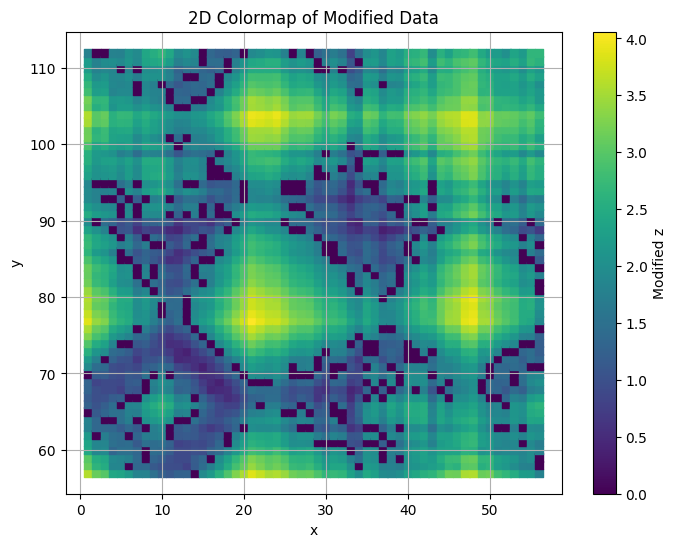

In [2]:
import os
import numpy as np
import matplotlib.pyplot as plt

folder_path = input("Enter the path of the folder containing 'distancemap.dat': ")

file_path = os.path.join(folder_path, 'distancemap.dat')

if not os.path.exists(file_path):
    print("Error: 'distancemap.dat' not found in the specified folder.")
    exit()

try:
    data = np.loadtxt(file_path)
except OSError as e:
    print("Error: Unable to open 'distancemap.dat'. Please check the file and try again.")
    exit()

x = data[:, 0]
y = data[:, 1]
z = data[:, 2]

z_modified = np.where((z >= 1.5) & (z <= 1.7), 0, z)

output_file_path = os.path.join(folder_path, 'modified_distancemap.dat')
with open(output_file_path, 'w') as f:
    for i in range(len(x)):
        f.write(f"{x[i]} {y[i]} {z_modified[i]}\n")

print("Modified data has been written to 'modified_distancemap.dat'.")

plt.figure(figsize=(8, 6))
plt.scatter(x, y, c=z_modified, cmap='viridis', marker='s')
plt.colorbar(label='Modified z')
plt.title('2D Colormap of Modified Data')
plt.xlabel('x')
plt.ylabel('y')
plt.grid(True)
plt.show()


In [4]:
import os

def count_data_points(file_path):
    try:
        with open(file_path, 'r') as file:
            lines = file.readlines()
            num_data_points = len(lines)
            return num_data_points
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
        return -1
    except Exception as e:
        print(f"An error occurred: {str(e)}")
        return -1

def main():
    folder_path = input("Enter the path of the folder: ")

    file_path = os.path.join(folder_path, 'twogauss.dat')

    if os.path.exists(file_path):
        num_data_points = count_data_points(file_path)
        if num_data_points != -1:
            print(f"Number of data points in '{file_path}': {num_data_points}")
    else:
        print(f"File '{file_path}' does not exist.")

if __name__ == "__main__":
    main()


Enter the path of the folder:  C:\Users\AquilA#42\Desktop\PRogLAb


Number of data points in 'C:\Users\AquilA#42\Desktop\PRogLAb\twogauss.dat': 20000


Enter the path of the folder:  C:\Users\AquilA#42\Desktop\PRogLAb


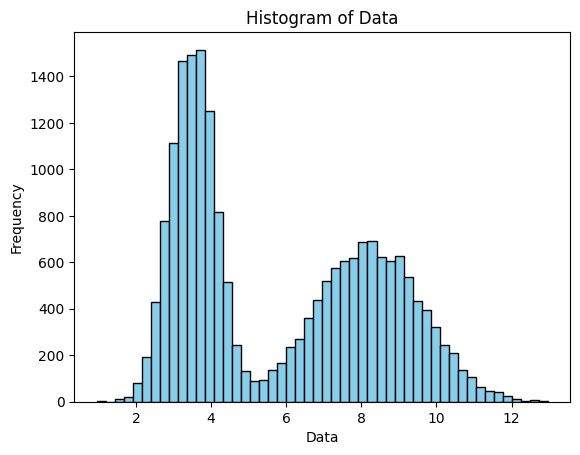

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt

def plot_histogram(file_path, num_bins=50):
    try:
        data = np.loadtxt(file_path)

        plt.hist(data, bins=num_bins, color='skyblue', edgecolor='black')

        plt.xlabel('Data')
        plt.ylabel('Frequency')
        plt.title('Histogram of Data')

        plt.show()
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

def main():
    folder_path = input("Enter the path of the folder: ")

    file_path = os.path.join(folder_path, 'twogauss.dat')

    if os.path.exists(file_path):
        plot_histogram(file_path)
    else:
        print(f"File '{file_path}' does not exist.")

if __name__ == "__main__":
    main()


Enter the path of the folder:  C:\Users\AquilA#42\Desktop\PRogLAb


Estimates for Left Gaussian:
Number of Samples: 4846
Mean: 3.0105858745356993
Standard Deviation: 0.3514967151436089

Estimates for Right Gaussian:
Number of Samples: 15154
Mean: 6.7710935539791475
Standard Deviation: 2.318397359296976


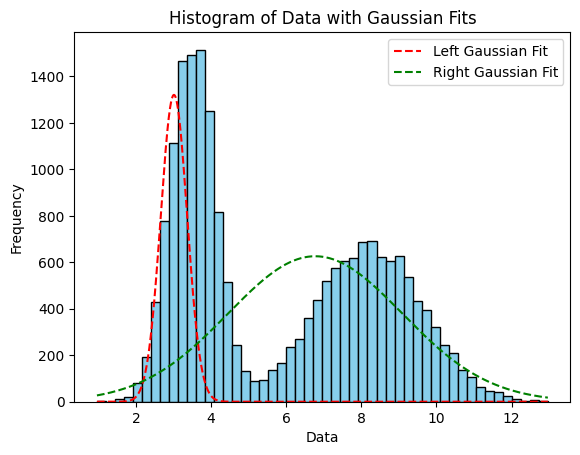

In [6]:
import os
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

def plot_histogram_with_peaks(file_path, num_bins=50):
    try:
        data = np.loadtxt(file_path)

        counts, bins, _ = plt.hist(data, bins=num_bins, color='skyblue', edgecolor='black')

        peak_indices = np.argsort(counts)[-2:]  
        peak_values = bins[peak_indices]         

        data_left = data[data < peak_values.mean()]
        data_right = data[data >= peak_values.mean()]

        x = np.linspace(data.min(), data.max(), 1000)
        paras_left = norm.fit(data_left)
        paras_right = norm.fit(data_right)
        pdf_left = norm.pdf(x, *paras_left)
        pdf_right = norm.pdf(x, *paras_right)
        plt.plot(x, pdf_left * len(data_left) * np.diff(bins)[0], 'r--', label='Left Gaussian Fit')
        plt.plot(x, pdf_right * len(data_right) * np.diff(bins)[0], 'g--', label='Right Gaussian Fit')
        plt.legend()

        print("Estimates for Left Gaussian:")
        print("Number of Samples:", len(data_left))
        print("Mean:", paras_left[0])
        print("Standard Deviation:", paras_left[1])
        print("\nEstimates for Right Gaussian:")
        print("Number of Samples:", len(data_right))
        print("Mean:", paras_right[0])
        print("Standard Deviation:", paras_right[1])

        plt.xlabel('Data')
        plt.ylabel('Frequency')
        plt.title('Histogram of Data with Gaussian Fits')
        plt.show()
    except FileNotFoundError:
        print(f"File '{file_path}' not found.")
    except Exception as e:
        print(f"An error occurred: {str(e)}")

def main():
    folder_path = input("Enter the path of the folder: ")

    file_path = os.path.join(folder_path, 'twogauss.dat')

    if os.path.exists(file_path):
        plot_histogram_with_peaks(file_path)
    else:
        print(f"File '{file_path}' does not exist.")

if __name__ == "__main__":
    main()
